<a href="https://colab.research.google.com/github/changhyun-cho/astrophysics/blob/master/correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A global optical / X-ray correlation from XRBs to AGN

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# import scipy
from scipy.stats import pearsonr

from scipy.optimize import curve_fit

from scipy.stats import linregress

%matplotlib inline

# from google.colab import drive
#
# drive.mount('/content/drive')
# drive.mount("/content/drive/", force_remount=True)
# drive.flush_and_unmount()

In [1213]:
# Set universal font properties
matplotlib.rcParams[
    "font.family"
] = "serif"  # Font family (e.g., 'serif', 'sans-serif', 'monospace')
matplotlib.rcParams["text.usetex"] = True
dpi = 500  # Set universal DPI for display and saving
plt.rcParams["figure.dpi"] = dpi  # For on-screen display
plt.rcParams["savefig.dpi"] = dpi  # For saving figures

In [1215]:
# Size (only for notebook)
plt.rcParams["figure.figsize"] = [10, 10]
colors = matplotlib.cm.Set1(np.linspace(0, 1, 20))

In [1219]:
def L_edd(mass_solar_units):
    """
    Calculate the Eddington Luminosity for a black hole using precise constants.

    Parameters:
    mass_solar_units (float): Mass of the black hole in solar masses.

    Returns:
    float: Eddington Luminosity in erg/s.
    """
    # Constants in CGS units
    pi = 3.141592  # Pi
    G = 6.674e-8  # Gravitational constant (cm^3 g^-1 s^-2)
    c = 2.998e10  # Speed of light (cm/s)
    sig_T = 6.6524e-25  # Thomson cross-section (cm^2)
    solar_mass_grams = 1.988416e33  # Solar mass in grams
    m_p = 1.67262192e-24

    # Convert black hole mass to grams
    black_hole_mass_grams = mass_solar_units * solar_mass_grams

    # Calculate Eddington Luminosity
    L_edd = (4 * pi * G * black_hole_mass_grams * m_p * c) / sig_T  # Directly in erg/s

    return L_edd


# Example usage
mass_in_solar_units = 10  # Input mass of the black hole in solar masses
L_edd_value = L_edd(mass_in_solar_units)
print(
    f"Eddington Luminosity for a black hole of {mass_in_solar_units} solar masses: {L_edd_value:.3e} erg/s"
)

Eddington Luminosity for a black hole of 10 solar masses: 1.257e+39 erg/s


## X-Ray Binaries

### GROJ1655

In [1223]:
# read the file
groj = pd.read_csv(
    "/Users/avm4/work/GitHub/astrophysics/agn-xrb/data/GROJ1655.dat", sep="\t"
)
groj = groj.dropna()
groj["Target"] = "GROJ1655"

# add lag (in hour)
groj["Lag"] = 19.3  # sec #19.3 from O'Brien 2002, 14.6 from Hynes 1998
groj["Lag"] /= 3600  # hour

# change units and calculate
groj["L_x"] = 10 ** groj["log(Lx_bol)"]
groj["L_opt"] = 10 ** groj["log(L_opt)"]
groj["sqrt(L_x) a"] = np.sqrt(groj["L_x"]) * groj["Lag"]

# add inclination
groj["cos_i"] = np.cos(np.radians(70.2))

# add BH mass and Eddington luminosity
groj["m_BH"] = 5.4
groj["L_edd"] = L_edd(groj["m_BH"])

# extract
groj = groj[["Target", "sqrt(L_x) a", "L_opt", "L_x", "cos_i", "L_edd"]]

# make a total data frame
df = groj[["Target", "sqrt(L_x) a", "L_opt", "L_x", "cos_i", "L_edd"]]

In [1225]:
groj

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,L_edd
1,GROJ1655,7.106270e+15,3.426936e+34,1.757008e+36,0.338738,6.788097e+38
2,GROJ1655,1.857830e+16,3.096749e+34,1.200888e+37,0.338738,6.788097e+38
3,GROJ1655,2.348740e+16,7.360477e+34,1.919377e+37,0.338738,6.788097e+38
4,GROJ1655,2.468571e+16,8.296711e+34,2.120223e+37,0.338738,6.788097e+38
5,GROJ1655,2.824622e+16,4.601569e+34,2.775946e+37,0.338738,6.788097e+38


### GX339

In [1228]:
# read the file
gx = pd.read_csv("/Users/avm4/work/GitHub/astrophysics/agn-xrb/data/gx339-4_hard.csv")


gx["Target"] = "GX339"

# add lag (in hour)
gx["Lag"] = 10  # sec from Gandhi 2010
gx["Lag"] /= 3600  # hour

# change units and calculate
gx["L_x"] = 10 ** gx["log(Lx_bol)"]
gx["L_opt"] = 10 ** gx["log(L_opt)"]
gx["sqrt(L_x) a"] = np.sqrt(gx["L_x"]) * gx["Lag"]

# add inclination
gx["cos_i"] = np.cos(np.radians(11))  # 57.5

# add BH mass and Eddington luminosity
gx["m_BH"] = 5.9
gx["L_edd"] = L_edd(gx["m_BH"])


# extract
gx = gx[["Target", "sqrt(L_x) a", "L_opt", "L_x", "cos_i", "L_edd"]]
gx = gx.dropna()
gx
# merge
df = pd.merge(df, gx, how="outer")
# df

In [1230]:
gx

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,L_edd
0,GX339,2.812194e+15,1.421578e+35,1.024933e+36,0.981627,7.416625e+38
1,GX339,6.996264e+15,2.889154e+35,6.343623e+36,0.981627,7.416625e+38
2,GX339,2.848003e+16,5.980957e+35,1.051201e+38,0.981627,7.416625e+38
3,GX339,3.475615e+16,7.059447e+35,1.565555e+38,0.981627,7.416625e+38
4,GX339,4.521504e+16,1.108589e+36,2.649542e+38,0.981627,7.416625e+38
5,GX339,5.648986e+16,1.204400e+36,4.135671e+38,0.981627,7.416625e+38
6,GX339,5.538148e+16,1.408545e+36,3.974973e+38,0.981627,7.416625e+38
7,GX339,5.580358e+16,1.370158e+36,4.035796e+38,0.981627,7.416625e+38
8,GX339,5.603297e+16,1.238143e+36,4.069044e+38,0.981627,7.416625e+38
9,GX339,5.662756e+16,1.587708e+36,4.155858e+38,0.981627,7.416625e+38


### XTEJ1118

In [1233]:
# read the file
xtej = pd.read_csv(
    "/Users/avm4/work/GitHub/astrophysics/agn-xrb/data/XTEJ1118.dat", sep="\t"
)
xtej["Target"] = "XTEJ1118"

# add lag (in hour)
xtej["Lag"] = 3.45  # sec
xtej["Lag"] /= 3600  # hour

# change units and calculate
xtej["L_x"] = 10 ** xtej["log(Lx_bol)"]
xtej["L_opt"] = 10 ** xtej["log(L_opt)"]
xtej["sqrt(L_x) a"] = np.sqrt(xtej["L_x"]) * xtej["Lag"]

# extract
xtej = xtej[["Target", "sqrt(L_x) a", "L_opt", "L_x"]]
xtej = xtej.dropna()

# add inclination
xtej["cos_i"] = np.cos(np.radians(75))

# add BH mass and Eddington luminosity
xtej["m_BH"] = 7.3
xtej["L_edd"] = L_edd(xtej["m_BH"])


# merge
df = pd.merge(df, xtej, how="outer")
# xtej

In [1235]:
xtej

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,m_BH,L_edd
0,XTEJ1118,1.129419e+15,1.560553e+34,1.388919e+36,0.258819,7.3,9.176502e+38
1,XTEJ1118,1.182317e+15,1.819897e+34,1.522070e+36,0.258819,7.3,9.176502e+38
2,XTEJ1118,1.216896e+15,1.684312e+34,1.612405e+36,0.258819,7.3,9.176502e+38
3,XTEJ1118,1.206595e+15,1.493065e+34,1.585221e+36,0.258819,7.3,9.176502e+38
4,XTEJ1118,1.239576e+15,1.619118e+34,1.673066e+36,0.258819,7.3,9.176502e+38
5,XTEJ1118,1.275231e+15,1.869299e+34,1.770698e+36,0.258819,7.3,9.176502e+38
6,XTEJ1118,1.274247e+15,1.626593e+34,1.767966e+36,0.258819,7.3,9.176502e+38
7,XTEJ1118,1.278539e+15,1.695424e+34,1.779898e+36,0.258819,7.3,9.176502e+38
8,XTEJ1118,1.267060e+15,1.685660e+34,1.748080e+36,0.258819,7.3,9.176502e+38
9,XTEJ1118,1.279049e+15,1.334376e+34,1.781316e+36,0.258819,7.3,9.176502e+38


### Swift J1753

In [1238]:
# read the file
j1753 = pd.read_csv("/Users/avm4/work/GitHub/astrophysics/agn-xrb/data/swift-j1753.csv")
# j1753 = j1753.dropna()

j1753["Target"] = "GX339"

# add lag (in hour)
j1753["Lag"] = 1.0  # sec 1.0
j1753["Lag"] /= 3600  # hour

# change units and calculate
j1753["L_x"] = 10 ** j1753["log(Lx_bol)"]
j1753["L_opt"] = 10 ** j1753["log(L_opt)"]
j1753["sqrt(L_x) a"] = np.sqrt(j1753["L_x"]) * j1753["Lag"]

# extract
j1753 = j1753[["Target", "sqrt(L_x) a", "L_opt", "L_x"]]
j1753

# add inclination
j1753["cos_i"] = np.cos(np.radians(60))

# add BH mass and Eddington luminosity
j1753["m_BH"] = 7.4
j1753["L_edd"] = L_edd(j1753["m_BH"])


# merge
df = pd.merge(df, j1753, how="outer")
# j1753

In [1240]:
j1753

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,m_BH,L_edd
0,GX339,8.431342e+14,1.559434e+34,9.212945e+36,0.5,7.4,9.302207e+38
1,GX339,1.905568e+15,1.907692e+34,4.706023e+37,0.5,7.4,9.302207e+38
2,GX339,1.440419e+15,1.946845e+34,2.688949e+37,0.5,7.4,9.302207e+38
3,GX339,9.351184e+14,1.635135e+34,1.133283e+37,0.5,7.4,9.302207e+38
4,GX339,1.020174e+15,1.835093e+34,1.348819e+37,0.5,7.4,9.302207e+38
5,GX339,7.319428e+14,1.765686e+34,6.943194e+36,0.5,7.4,9.302207e+38


## AGN

### Temporary part (Import data directly from Excel)

In [1244]:
custom_header = ["time", "flux"]

In [1246]:
mr2251_opt = pd.read_csv(
    "/Users/avm4/work/GitHub/astrophysics/agn-xrb/data/mr2251-178_optical",
    header=None,
    names=custom_header,
)
mr2251_opt["flux"] *= 1.0e-11
mr2251_opt["flux"] *= 3.33564095e04  # see the other file for unit conversion
# mr2251_opt["flux"] *= 5326# # To cancel A, but is that really right? (Jy)
mr2251_opt["flux"] *= 1000  # To make mJy
mr2251_opt  # mJy

,time,flux
0,3949.689,0.000107
1,3959.544,0.000108
2,3962.656,0.000110
3,3966.805,0.000112
4,3969.917,0.000116
5,3974.066,0.000118
6,3980.290,0.000118
7,3986.515,0.000118
8,3993.776,0.000121
9,4002.075,0.000122


In [1248]:
mr2251_xray = pd.read_csv(
    "/Users/avm4/work/GitHub/astrophysics/agn-xrb/data/mr2251-178_x-ray",
    header=None,
    names=custom_header,
)
# mr2251_xray["flux"] *= 3.33564095E+04 # see the other file for unit conversion
mr2251_xray["flux"] *= 1.0e-11
mr2251_xray

,time,flux
0,3943.582,3.111000e-11
1,3952.381,3.833000e-11
2,3967.909,4.028000e-11
3,3979.296,4.639000e-11
4,3996.894,5.000000e-11
...,...,...
58,4433.747,5.111000e-11
59,4439.959,4.667000e-11
60,4442.029,4.194000e-11
61,4450.311,3.917000e-11


In [1250]:
# read AGN data
agn = pd.read_csv("/Users/avm4/work/GitHub/astrophysics/agn-xrb/data/agn_data.csv")
agn["Target"] = agn["targets"]
# agn["Lag"] = agn["Lags(hour)"]

# change units and calculate
agn["L_x"] = 10 ** agn["log(Lx_bol)"]
agn["L_opt"] = 10 ** agn["log(L_opt)"]
# agn["sqrt(L_x) a"] = np.sqrt(agn["L_x"]) * agn["Lag"]

# extract
# agn = agn[["Target", "sqrt(L_x) a", "L_opt", "L_x"]]

# merge
# df = pd.merge(df, agn, how="outer")
# df
agn

,targets,log(Lx_bol),log(L_opt),Target,L_x,L_opt
0,NGC2617,43.756590,42.667831,NGC2617,5.709398e+43,4.654049e+42
1,NGC2617,43.663107,42.666249,NGC2617,4.603705e+43,4.637122e+42
2,NGC2617,43.672488,42.663000,NGC2617,4.704222e+43,4.602566e+42
3,NGC2617,43.668760,42.653456,NGC2617,4.664015e+43,4.502524e+42
4,NGC2617,43.748876,42.663829,NGC2617,5.608881e+43,4.611361e+42
...,...,...,...,...,...,...
415,NGC4151,43.449250,42.101555,NGC4151,2.813521e+43,1.263441e+42
416,NGC4151,43.455923,42.087750,NGC4151,2.857087e+43,1.223913e+42
417,NGC4151,43.483077,42.124498,NGC4151,3.041428e+43,1.331982e+42
418,NGC4151,43.506782,42.122711,NGC4151,3.212049e+43,1.326512e+42


### NGC4593

In [1253]:
n4593 = {
    "log(Lx_bol)": [43.46477309, 43.0967963],
    "log(L_opt)": [41.90607624, 41.60504625],
    "Target": ["NGC4593", "NGC4593"],
    "Lag": [0.907 * 24, 0.907 * 24],
}

# Create a DataFrame
n4593 = pd.DataFrame(n4593)

# change units and calculate
n4593["L_x"] = 10 ** n4593["log(Lx_bol)"]
n4593["L_opt"] = 10 ** n4593["log(L_opt)"]
n4593["sqrt(L_x) a"] = np.sqrt(n4593["L_x"]) * n4593["Lag"]

# add inclination
n4593["cos_i"] = np.cos(np.radians(20))

# add BH mass and Eddington luminosity
n4593["m_BH"] = 7.63e6
n4593["L_edd"] = L_edd(n4593["m_BH"])


# extract
n4593 = n4593[["Target", "sqrt(L_x) a", "L_opt", "L_x", "cos_i", "L_edd"]]
# n4395
# merge
df = pd.merge(df, n4593, how="outer")
# df

In [1268]:
n4593

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,L_edd
0,NGC4593,1.175452e+23,8.055198e+41,2.915903e+43,0.939693,9.591330e+44
1,NGC4593,7.695143e+22,4.027599e+41,1.249673e+43,0.939693,9.591330e+44


### NGC4151

In [1271]:
n4151 = agn[agn["Target"] == "NGC4151"]

# change units and calculate
n4151["Lag"] = (0.34 + 0.96) * 24  # 0.34
n4151["sqrt(L_x) a"] = np.sqrt(n4151["L_x"]) * n4151["Lag"]

# add inclination
n4151["cos_i"] = np.cos(np.radians(45))

# add BH mass and Eddington luminosity
n4151["m_BH"] = 5.4e7
n4151["L_edd"] = L_edd(n4151["m_BH"])


n4151 = n4151[["Target", "sqrt(L_x) a", "L_opt", "L_x", "cos_i", "L_edd"]]
# n4395
# merge
df = pd.merge(df, n4151, how="outer")
# df

/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/127565146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n4151["Lag"] = (0.34+0.96) * 24  # 0.34
/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/127565146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n4151["sqrt(L_x) a"] = np.sqrt(n4151["L_x"]) * n4151["Lag"]
/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/127565146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [1273]:
n4151

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,L_edd
118,NGC4151,1.953186e+23,1.308391e+42,3.919023e+43,0.707107,6.788097e+45
119,NGC4151,2.100993e+23,1.254582e+42,4.534609e+43,0.707107,6.788097e+45
120,NGC4151,2.356237e+23,1.384648e+42,5.703334e+43,0.707107,6.788097e+45
121,NGC4151,2.220724e+23,1.283269e+42,5.066173e+43,0.707107,6.788097e+45
122,NGC4151,1.991913e+23,1.426525e+42,4.075977e+43,0.707107,6.788097e+45
...,...,...,...,...,...,...
415,NGC4151,1.654930e+23,1.263441e+42,2.813521e+43,0.707107,6.788097e+45
416,NGC4151,1.667694e+23,1.223913e+42,2.857087e+43,0.707107,6.788097e+45
417,NGC4151,1.720653e+23,1.331982e+42,3.041428e+43,0.707107,6.788097e+45
418,NGC4151,1.768258e+23,1.326512e+42,3.212049e+43,0.707107,6.788097e+45


### NGC3516

In [1276]:
n3516 = {
    "log(Lx_bol)": [
        42.75427141,
        43.26615477,
        43.40344395,
        43.50439394,
        43.29313826,
        42.59154411,
        42.39524947,
    ],
    "log(L_opt)": [
        41.22413275,
        41.37055074,
        41.59063864,
        41.70835932,
        41.57812735,
        40.97698508,
        40.56992657,
    ],
    "Target": [
        "NGC3516",
        "NGC3516",
        "NGC3516",
        "NGC3516",
        "NGC3516",
        "NGC3516",
        "NGC3516",
    ],
    "Lag": [2.0 * 24, 2.0 * 24, 2.0 * 24, 2.0 * 24, 2.0 * 24, 2.0 * 24, 2.0 * 24],
}


# Create a DataFrame
n3516 = pd.DataFrame(n3516)

# change units and calculate
n3516["L_x"] = 10 ** n3516["log(Lx_bol)"]
n3516["L_opt"] = 10 ** n3516["log(L_opt)"]
n3516["sqrt(L_x) a"] = np.sqrt(n3516["L_x"]) * n3516["Lag"]

# add inclination
n3516["cos_i"] = np.cos(np.radians(38))  # cos(38)=0.78, cos(27)=0.89

# add BH mass and Eddington luminosity
n3516["m_BH"] = 1.91e6
n3516["L_edd"] = L_edd(n3516["m_BH"])


# extract
n3516 = n3516[["Target", "sqrt(L_x) a", "L_opt", "L_x", "cos_i", "L_edd"]]
# n4395
# merge
df = pd.merge(df, n3516, how="outer")
# df)

In [1278]:
n3516

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,L_edd
0,NGC3516,1.143871e+23,1.675455e+41,5.678994e+42,0.788011,2.400975e+44
1,NGC3516,2.062142e+23,2.347203e+41,1.845673e+43,0.788011,2.400975e+44
2,NGC3516,2.415256e+23,3.896177e+41,2.531885e+43,0.788011,2.400975e+44
3,NGC3516,2.712928e+23,5.109275e+41,3.194434e+43,0.788011,2.400975e+44
4,NGC3516,2.127210e+23,3.785536e+41,1.963985e+43,0.788011,2.400975e+44
5,NGC3516,9.484475e+22,9.483859e+40,3.904308e+42,0.788011,2.400975e+44
6,NGC3516,7.565994e+22,3.714724e+40,2.484560e+42,0.788011,2.400975e+44


### NGC4051

In [1281]:
n4051 = {
    "log(Lx_bol)": [42.55961056],
    "log(L_opt)": [41.40543954],
    "Target": ["NGC4051"],
    "Lag": [1.2 * 24],
}

# Create a DataFrame
n4051 = pd.DataFrame(n4051)

# change units and calculate
n4051["L_x"] = 10 ** n4051["log(Lx_bol)"]
n4051["L_opt"] = 10 ** n4051["log(L_opt)"]
n4051["sqrt(L_x) a"] = np.sqrt(n4051["L_x"]) * n4051["Lag"]

# add inclination
n4051["cos_i"] = np.cos(np.radians(78))

# add BH mass and Eddington luminosity
n4051["m_BH"] = 1.73e6
n4051["L_edd"] = L_edd(n4051["m_BH"])


# extract
n4051 = n4051[["Target", "sqrt(L_x) a", "L_opt", "L_x", "cos_i", "L_edd"]]
# n4395
# merge
df = pd.merge(df, n4051, how="outer")
# df

In [1283]:
n4051

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,L_edd
0,NGC4051,5.485267e+22,2.543546e+41,3.627526e+42,0.207912,2.174705e+44


### NGC2617

In [1286]:
n2617 = agn[agn["Target"] == "NGC2617"]

# change units and calculate
n2617["Lag"] = 2.47 * 24
# n2617["L_x"] = 10 ** n2617["log(Lx_bol)"]
# n2617["L_opt"] = 10 ** n2617["log(L_opt)"]
n2617["sqrt(L_x) a"] = np.sqrt(n2617["L_x"]) * n2617["Lag"]

# add inclination
n2617["cos_i"] = np.cos(np.radians(43))


# add BH mass and Eddington luminosity
n2617["m_BH"] = 3.24e7
n2617["L_edd"] = L_edd(n2617["m_BH"])


n2617 = n2617[["Target", "sqrt(L_x) a", "L_opt", "L_x", "cos_i", "L_edd"]]


# merge
df = pd.merge(df, n2617, how="outer")
# df

/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/300960792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n2617["Lag"] = 2.47 * 24
/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/300960792.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n2617["sqrt(L_x) a"] = np.sqrt(n2617["L_x"]) * n2617["Lag"]
/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/300960792.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [1288]:
n2617

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,L_edd
0,NGC2617,4.479230e+23,4.654049e+42,5.709398e+43,0.731354,4.072858e+45
1,NGC2617,4.022184e+23,4.637122e+42,4.603705e+43,0.731354,4.072858e+45
2,NGC2617,4.065857e+23,4.602566e+42,4.704222e+43,0.731354,4.072858e+45
3,NGC2617,4.048444e+23,4.502524e+42,4.664015e+43,0.731354,4.072858e+45
4,NGC2617,4.439625e+23,4.611361e+42,5.608881e+43,0.731354,4.072858e+45
...,...,...,...,...,...,...
113,NGC2617,4.100461e+23,3.899430e+42,4.784636e+43,0.731354,4.072858e+45
114,NGC2617,3.986901e+23,3.900533e+42,4.523291e+43,0.731354,4.072858e+45
115,NGC2617,4.022184e+23,4.008665e+42,4.603705e+43,0.731354,4.072858e+45
116,NGC2617,3.595586e+23,4.087594e+42,3.678943e+43,0.731354,4.072858e+45


### NGC 4395

In [1291]:
n4395 = {
    "log(Lx_bol)": [
        41.71714338,
        41.32503292,
        40.84791166,
    ],  # [41.59438157, 41.2022711, 40.72514985],
    "log(L_opt)": [
        39.5380524,
        39.30273827,
        38.96186472,
    ],  # [39.52690065, 39.22587066, 38.82793065],
    "Target": ["NGC4395", "NGC4395", "NGC4395"],
    "Lag": [0.21888889, 0.21888889, 0.21888889],  # 788 sec to hours
}


# Create a DataFrame
n4395 = pd.DataFrame(n4395)

# change units and calculate
n4395["L_x"] = 10 ** n4395["log(Lx_bol)"]
n4395["L_opt"] = 10 ** n4395["log(L_opt)"]
n4395["sqrt(L_x) a"] = np.sqrt(n4395["L_x"]) * n4395["Lag"]

# add inclination
n4395["cos_i"] = np.cos(np.radians(37))  # 45 37

# add BH mass and Eddington luminosity
n4395["m_BH"] = 3.6e5
n4395["L_edd"] = L_edd(n4395["m_BH"])


# extract
n4395 = n4395[["Target", "sqrt(L_x) a", "L_opt", "L_x", "cos_i", "L_edd"]]
# n4395
# merge
df = pd.merge(df, n4395, how="outer")
df

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,L_edd,m_BH
0,GROJ1655,7.106270e+15,3.426936e+34,1.757008e+36,0.338738,6.788097e+38,NaN
1,GROJ1655,1.857830e+16,3.096749e+34,1.200888e+37,0.338738,6.788097e+38,NaN
2,GROJ1655,2.348740e+16,7.360477e+34,1.919377e+37,0.338738,6.788097e+38,NaN
3,GROJ1655,2.468571e+16,8.296711e+34,2.120223e+37,0.338738,6.788097e+38,NaN
4,GROJ1655,2.824622e+16,4.601569e+34,2.775946e+37,0.338738,6.788097e+38,NaN
...,...,...,...,...,...,...,...
541,NGC2617,3.595586e+23,4.087594e+42,3.678943e+43,0.731354,4.072858e+45,NaN
542,NGC2617,3.860872e+23,4.069821e+42,4.241842e+43,0.731354,4.072858e+45,NaN
543,NGC4395,1.580503e+20,3.451854e+39,5.213668e+41,0.798636,4.525398e+43,NaN
544,NGC4395,1.006329e+20,2.007882e+39,2.113649e+41,0.798636,4.525398e+43,NaN


In [1292]:
n4395

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,L_edd
0,NGC4395,1.580503e+20,3.451854e+39,5.213668e+41,0.798636,4.525398e+43
1,NGC4395,1.006329e+20,2.007882e+39,2.113649e+41,0.798636,4.525398e+43
2,NGC4395,5.810046e+19,9.159351e+38,7.045497e+40,0.798636,4.525398e+43


### NGC 6814

In [1296]:
n6814 = {
    "log(Lx_bol)": [43.06633308, 42.6983563, 42.22123504],
    "log(L_opt)": [41.18588092, 40.99174683, 40.78288835],
    "Target": ["NGC6814", "NGC6814", "NGC6814"],
    "Lag": [1.9 * 24, 1.9 * 24, 1.9 * 24],
}


# Create a DataFrame
n6814 = pd.DataFrame(n6814)

# change units and calculate
n6814["L_x"] = 10 ** n6814["log(Lx_bol)"]
n6814["L_opt"] = 10 ** n6814["log(L_opt)"]
n6814["sqrt(L_x) a"] = np.sqrt(n6814["L_x"]) * n6814["Lag"]

# add inclination
n6814["cos_i"] = np.cos(np.radians(50))

# add BH mass and Eddington luminosity
n6814["m_BH"] = 1.85e7
n6814["L_edd"] = L_edd(n6814["m_BH"])


# extract
n6814 = n6814[["Target", "sqrt(L_x) a", "L_opt", "L_x", "cos_i", "L_edd"]]

# merge
df = pd.merge(df, n6814, how="outer")
# df

In [1298]:
n6814

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,L_edd
0,NGC6814,1.556436e+23,1.534196e+41,1.165019e+43,0.642788,2.325552e+45
1,NGC6814,1.018927e+23,9.811758e+40,4.992939e+42,0.642788,2.325552e+45
2,NGC6814,5.882777e+22,6.065804e+40,1.664313e+42,0.642788,2.325552e+45


### NGC5548 (Removing Host Galaxy Contribution)

#### 1. Download data from the archive



In [1302]:
df

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,L_edd,m_BH
0,GROJ1655,7.106270e+15,3.426936e+34,1.757008e+36,0.338738,6.788097e+38,NaN
1,GROJ1655,1.857830e+16,3.096749e+34,1.200888e+37,0.338738,6.788097e+38,NaN
2,GROJ1655,2.348740e+16,7.360477e+34,1.919377e+37,0.338738,6.788097e+38,NaN
3,GROJ1655,2.468571e+16,8.296711e+34,2.120223e+37,0.338738,6.788097e+38,NaN
4,GROJ1655,2.824622e+16,4.601569e+34,2.775946e+37,0.338738,6.788097e+38,NaN
...,...,...,...,...,...,...,...
544,NGC4395,1.006329e+20,2.007882e+39,2.113649e+41,0.798636,4.525398e+43,NaN
545,NGC4395,5.810046e+19,9.159351e+38,7.045497e+40,0.798636,4.525398e+43,NaN
546,NGC6814,1.556436e+23,1.534196e+41,1.165019e+43,0.642788,2.325552e+45,NaN
547,NGC6814,1.018927e+23,9.811758e+40,4.992939e+42,0.642788,2.325552e+45,NaN


## Plots and Fittings

In [1305]:
# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Calculate the Pearson correlation coefficient
r_value, _ = pearsonr(np.log10(df["sqrt(L_x) a"]), np.log10(df["L_opt"]))
print("R-value (Correlation Coefficient):", r_value)

R-value (Correlation Coefficient): 0.9979706115588781


In [1307]:
# Example data
x = np.log10(df["sqrt(L_x) a"])
y = np.log10(df["L_opt"])
# y_err = np.array([0.1, 0.1, 0.1, 0.1, 0.1])  # Standard deviations (errors) of y


# Define a model function (e.g., a linear function)
def model(x, a, b):
    return 1.000040304102203 * x + 19.205922827856142


# 1.000040304102203, 19.205922827856142
# Perform curve fitting
popt, pcov = curve_fit(model, x, y)

# Calculate the chi-squared value
y_err = 1.0
chi_squared = np.sum(((y - model(x, *popt)) / y_err) ** 2)

# Calculate the degrees of freedom
dof = len(x) - len(popt)

# Calculate the reduced chi-squared value
reduced_chi_squared = chi_squared / dof
print("Reduced Chi-Squared:", reduced_chi_squared)

Reduced Chi-Squared: 0.15328247654365504


/Users/avm4/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [1309]:
# Example data
x = np.log10(df["sqrt(L_x) a"])
y = np.log10(df["L_opt"])


# Define a model function (e.g., a linear function)
def model(x, a, b):
    return 1.000040304102203 * x + 19.205922827856142


# Perform curve fitting
popt, pcov = curve_fit(model, x, y)

# Calculate the expected values from the model
expected_y = model(x, *popt)

# Calculate the residuals
residuals = y - expected_y

# Estimate the standard deviation of the residuals
estimated_error = np.std(residuals)

# Use the estimated standard deviation as the error for each data point
y_err = np.full_like(y, estimated_error)

# Calculate the chi-squared value using the estimated errors
chi_squared = np.sum(((y - expected_y) / y_err) ** 2)

# Calculate the degrees of freedom
dof = len(x) - len(popt)

# Calculate the reduced chi-squared value
reduced_chi_squared = chi_squared / dof

print("Chi-Squared:", chi_squared)
print("Reduced Chi-Squared:", reduced_chi_squared)
print("Estimated Error:", estimated_error)

Chi-Squared: 1399.8730796503169
Reduced Chi-Squared: 2.5591829609695007
Estimated Error: 0.24473472019178513


/Users/avm4/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [1311]:
# Example data
x = np.log10(df["sqrt(L_x) a"])
y = np.log10(df["L_opt"])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the expected values from the linear model
expected_y = slope * x + intercept

# Calculate the residuals
residuals = y - expected_y

# Estimate the standard deviation of the residuals
estimated_error = np.std(
    residuals, ddof=2
)  # Use ddof=2 to account for the two parameters (slope and intercept)

# Use the estimated standard deviation as the error for each data point
y_err = np.full_like(y, estimated_error)

# Calculate the chi-squared value using the estimated errors
chi_squared = np.sum(((y - expected_y) / y_err) ** 2)

# Calculate the degrees of freedom
dof = (
    len(x) - 2
)  # Number of data points minus number of parameters (slope and intercept)

# Calculate the reduced chi-squared value
reduced_chi_squared = chi_squared / dof

print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("Chi-Squared:", chi_squared)
print("Reduced Chi-Squared:", reduced_chi_squared)
print("Estimated Error:", estimated_error)

Slope: 0.9539386832394238
Intercept: 19.906089273321726
R-value: 0.9979706115588772
Chi-Squared: 546.9999999999998
Reduced Chi-Squared: 0.9999999999999996
Estimated Error: 0.19544714850170988


In [1313]:
# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Calculate the Pearson correlation coefficient
r_value, _ = pearsonr(np.log10(df["sqrt(L_x) a"] * df["cos_i"]), np.log10(df["L_opt"]))
print("R-value (Correlation Coefficient):", r_value)

R-value (Correlation Coefficient): 0.9984663991470702


In [1315]:
# Example data
x = np.log10(df["sqrt(L_x) a"] * df["cos_i"])
y = np.log10(df["L_opt"])


# Define a model function (e.g., a linear function)
def model(x, a, b):
    return 0.9626054008148883 * x + 20.206523644512476


# Perform curve fitting
popt, pcov = curve_fit(model, x, y)

# Calculate the expected values from the model
expected_y = model(x, *popt)

# Calculate the residuals
residuals = y - expected_y

# Estimate the standard deviation of the residuals
estimated_error = np.std(residuals)

# Use the estimated standard deviation as the error for each data point
y_err = np.full_like(y, estimated_error)

# Calculate the chi-squared value using the estimated errors
chi_squared = np.sum(((y - expected_y) / y_err) ** 2)

# Calculate the degrees of freedom
dof = len(x) - len(popt)

# Calculate the reduced chi-squared value
reduced_chi_squared = chi_squared / dof

print("Chi-Squared:", chi_squared)
print("Reduced Chi-Squared:", reduced_chi_squared)
print("Estimated Error:", estimated_error)

Chi-Squared: 1928.6124738523445
Reduced Chi-Squared: 3.5257997693827137
Estimated Error: 0.1986525011316097


/Users/avm4/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [1317]:
# Example data
x = np.log10(df["sqrt(L_x) a"] * df["cos_i"])
y = np.log10(df["L_opt"])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the expected values from the linear model
expected_y = slope * x + intercept

# Calculate the residuals
residuals = y - expected_y

# Estimate the standard deviation of the residuals
estimated_error = np.std(
    residuals, ddof=2
)  # Use ddof=2 to account for the two parameters (slope and intercept)

# Use the estimated standard deviation as the error for each data point
y_err = np.full_like(y, estimated_error)

# Calculate the chi-squared value using the estimated errors
chi_squared = np.sum(((y - expected_y) / y_err) ** 2)

# Calculate the degrees of freedom
dof = (
    len(x) - 2
)  # Number of data points minus number of parameters (slope and intercept)

# Calculate the reduced chi-squared value
reduced_chi_squared = chi_squared / dof

print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("Chi-Squared:", chi_squared)
print("Reduced Chi-Squared:", reduced_chi_squared)
print("Estimated Error:", estimated_error)

Slope: 0.9311294992730061
Intercept: 20.57196846369977
R-value: 0.9984663991470699
Chi-Squared: 547.0000000000001
Reduced Chi-Squared: 1.0000000000000002
Estimated Error: 0.16992481100767637


In [1319]:
n3516

,Target,sqrt(L_x) a,L_opt,L_x,cos_i,L_edd
0,NGC3516,1.143871e+23,1.675455e+41,5.678994e+42,0.788011,2.400975e+44
1,NGC3516,2.062142e+23,2.347203e+41,1.845673e+43,0.788011,2.400975e+44
2,NGC3516,2.415256e+23,3.896177e+41,2.531885e+43,0.788011,2.400975e+44
3,NGC3516,2.712928e+23,5.109275e+41,3.194434e+43,0.788011,2.400975e+44
4,NGC3516,2.127210e+23,3.785536e+41,1.963985e+43,0.788011,2.400975e+44
5,NGC3516,9.484475e+22,9.483859e+40,3.904308e+42,0.788011,2.400975e+44
6,NGC3516,7.565994e+22,3.714724e+40,2.484560e+42,0.788011,2.400975e+44


/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/3727615937.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(
/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/3727615937.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(
/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/3727615937.py:19: UserWarning: *c* argument looks like a single numeric RGB or R

(0.9539386832394247, 19.906089273321726)

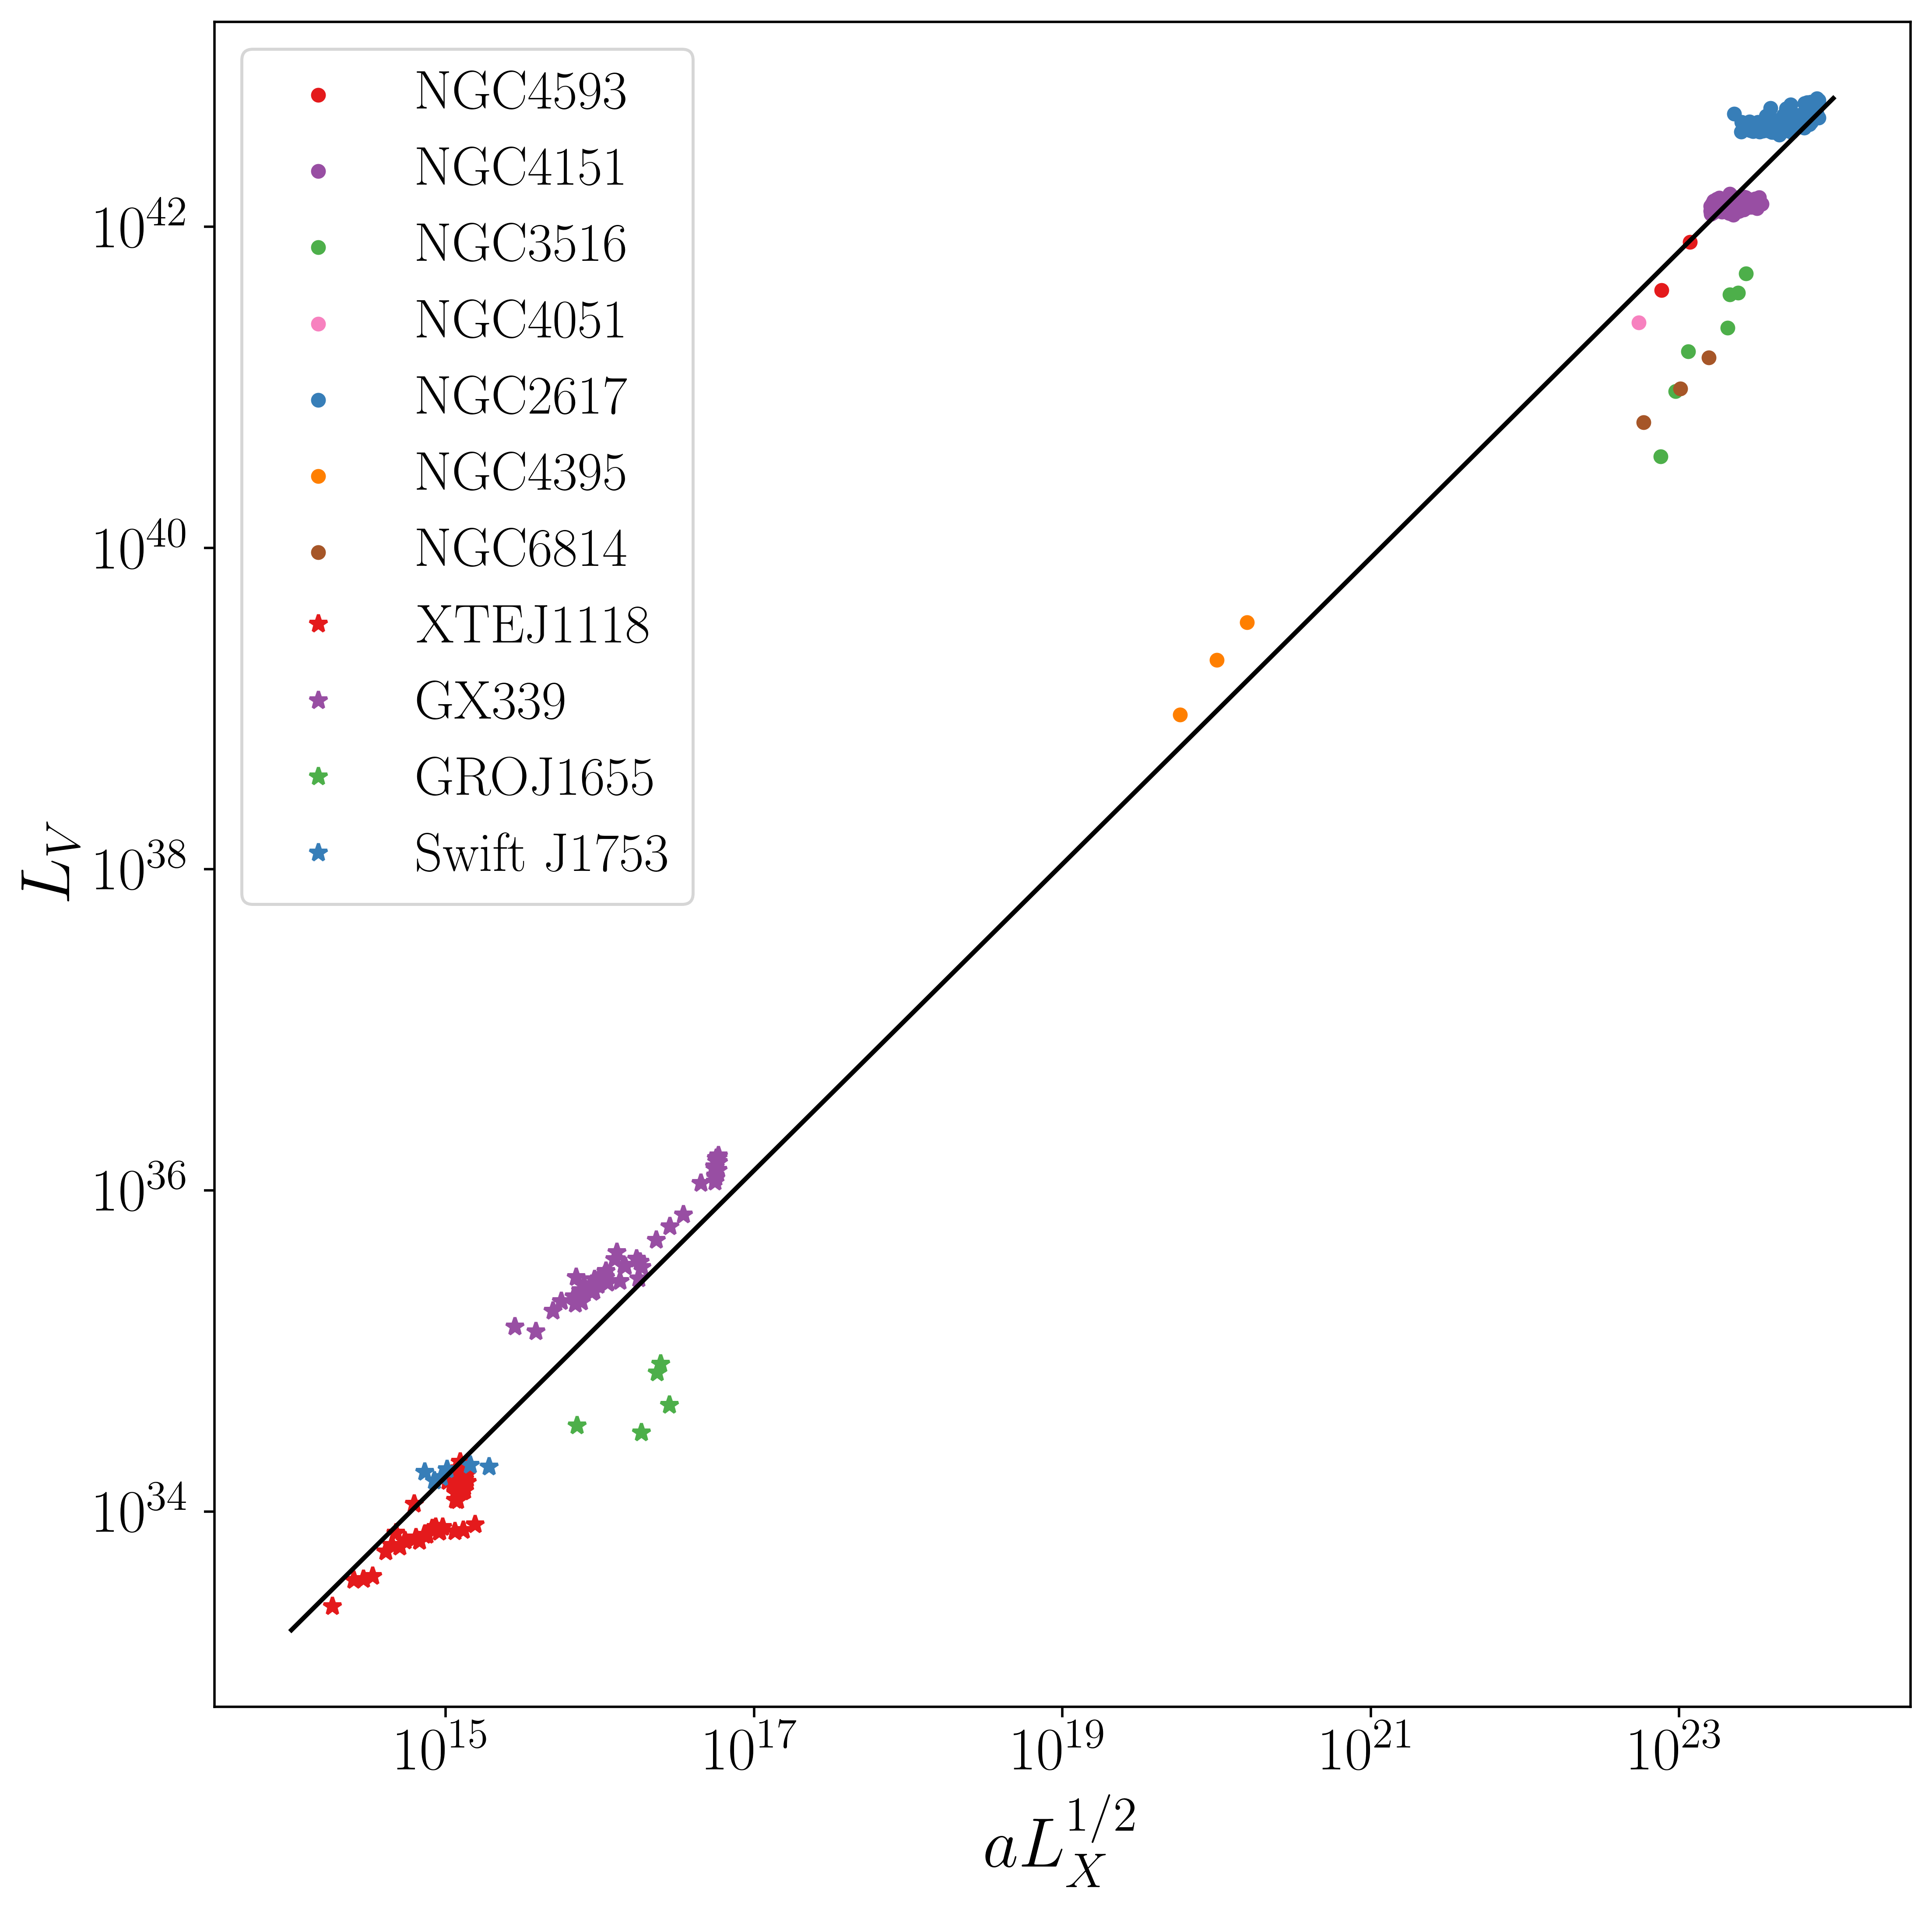

In [1334]:
# df = df[df["Target"]!="NGC4151"]
# df = df[df["Target"]!="NGC2617"]

# AGN
plt.scatter(
    n4593["sqrt(L_x) a"],
    n4593["L_opt"],
    s=15,
    c=colors[0],
    label="NGC4593",
)
plt.scatter(
    n4151["sqrt(L_x) a"],
    n4151["L_opt"],
    s=15,
    c=colors[8],
    label="NGC4151",
)
plt.scatter(
    n3516["sqrt(L_x) a"],
    n3516["L_opt"],
    s=15,
    c=colors[5],
    label="NGC3516",
)
plt.scatter(
    n4051["sqrt(L_x) a"],
    n4051["L_opt"],
    s=15,
    c=colors[15],
    label="NGC4051",
)
plt.scatter(
    n2617["sqrt(L_x) a"],
    n2617["L_opt"],
    s=15,
    c=colors[3],
    label="NGC2617",
)
plt.scatter(
    n4395["sqrt(L_x) a"],
    n4395["L_opt"],
    s=15,
    c=colors[10],
    label="NGC4395",
)
plt.scatter(
    n6814["sqrt(L_x) a"],
    n6814["L_opt"],
    s=15,
    c=colors[13],
    label="NGC6814",
)

# XRBs
plt.plot(
    xtej["sqrt(L_x) a"],
    xtej["L_opt"],
    "*",
    c=colors[2],
    label="XTEJ1118",
)
plt.plot(gx["sqrt(L_x) a"], gx["L_opt"], "*", c=colors[7], label="GX339")
plt.plot(
    groj["sqrt(L_x) a"],
    groj["L_opt"],
    "*",
    c=colors[6],
    label="GROJ1655",
)
plt.plot(
    j1753["sqrt(L_x) a"],
    j1753["L_opt"],
    "*",
    c=colors[3],
    label="Swift J1753",
)


# info
plt.legend(fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$a L_X^{1/2}$", fontsize=23)
plt.ylabel(r"$L_{V}$", fontsize=23)


# fitting
logA = np.log10(df["sqrt(L_x) a"])
logB = np.log10(df["L_opt"])

a, b = np.polyfit(logA, logB, 1)


xfit = np.logspace(14, 24, 100)


def function(x, a, b):
    return 10 ** (b) * x ** (a)


# Increase tick sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(xfit, function(xfit, a, b), c="black")

a, b  # exactly the same as the excel result

/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/308987951.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(
/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/308987951.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(
/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/308987951.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA

(0.9311294992730064, 20.57196846369978)

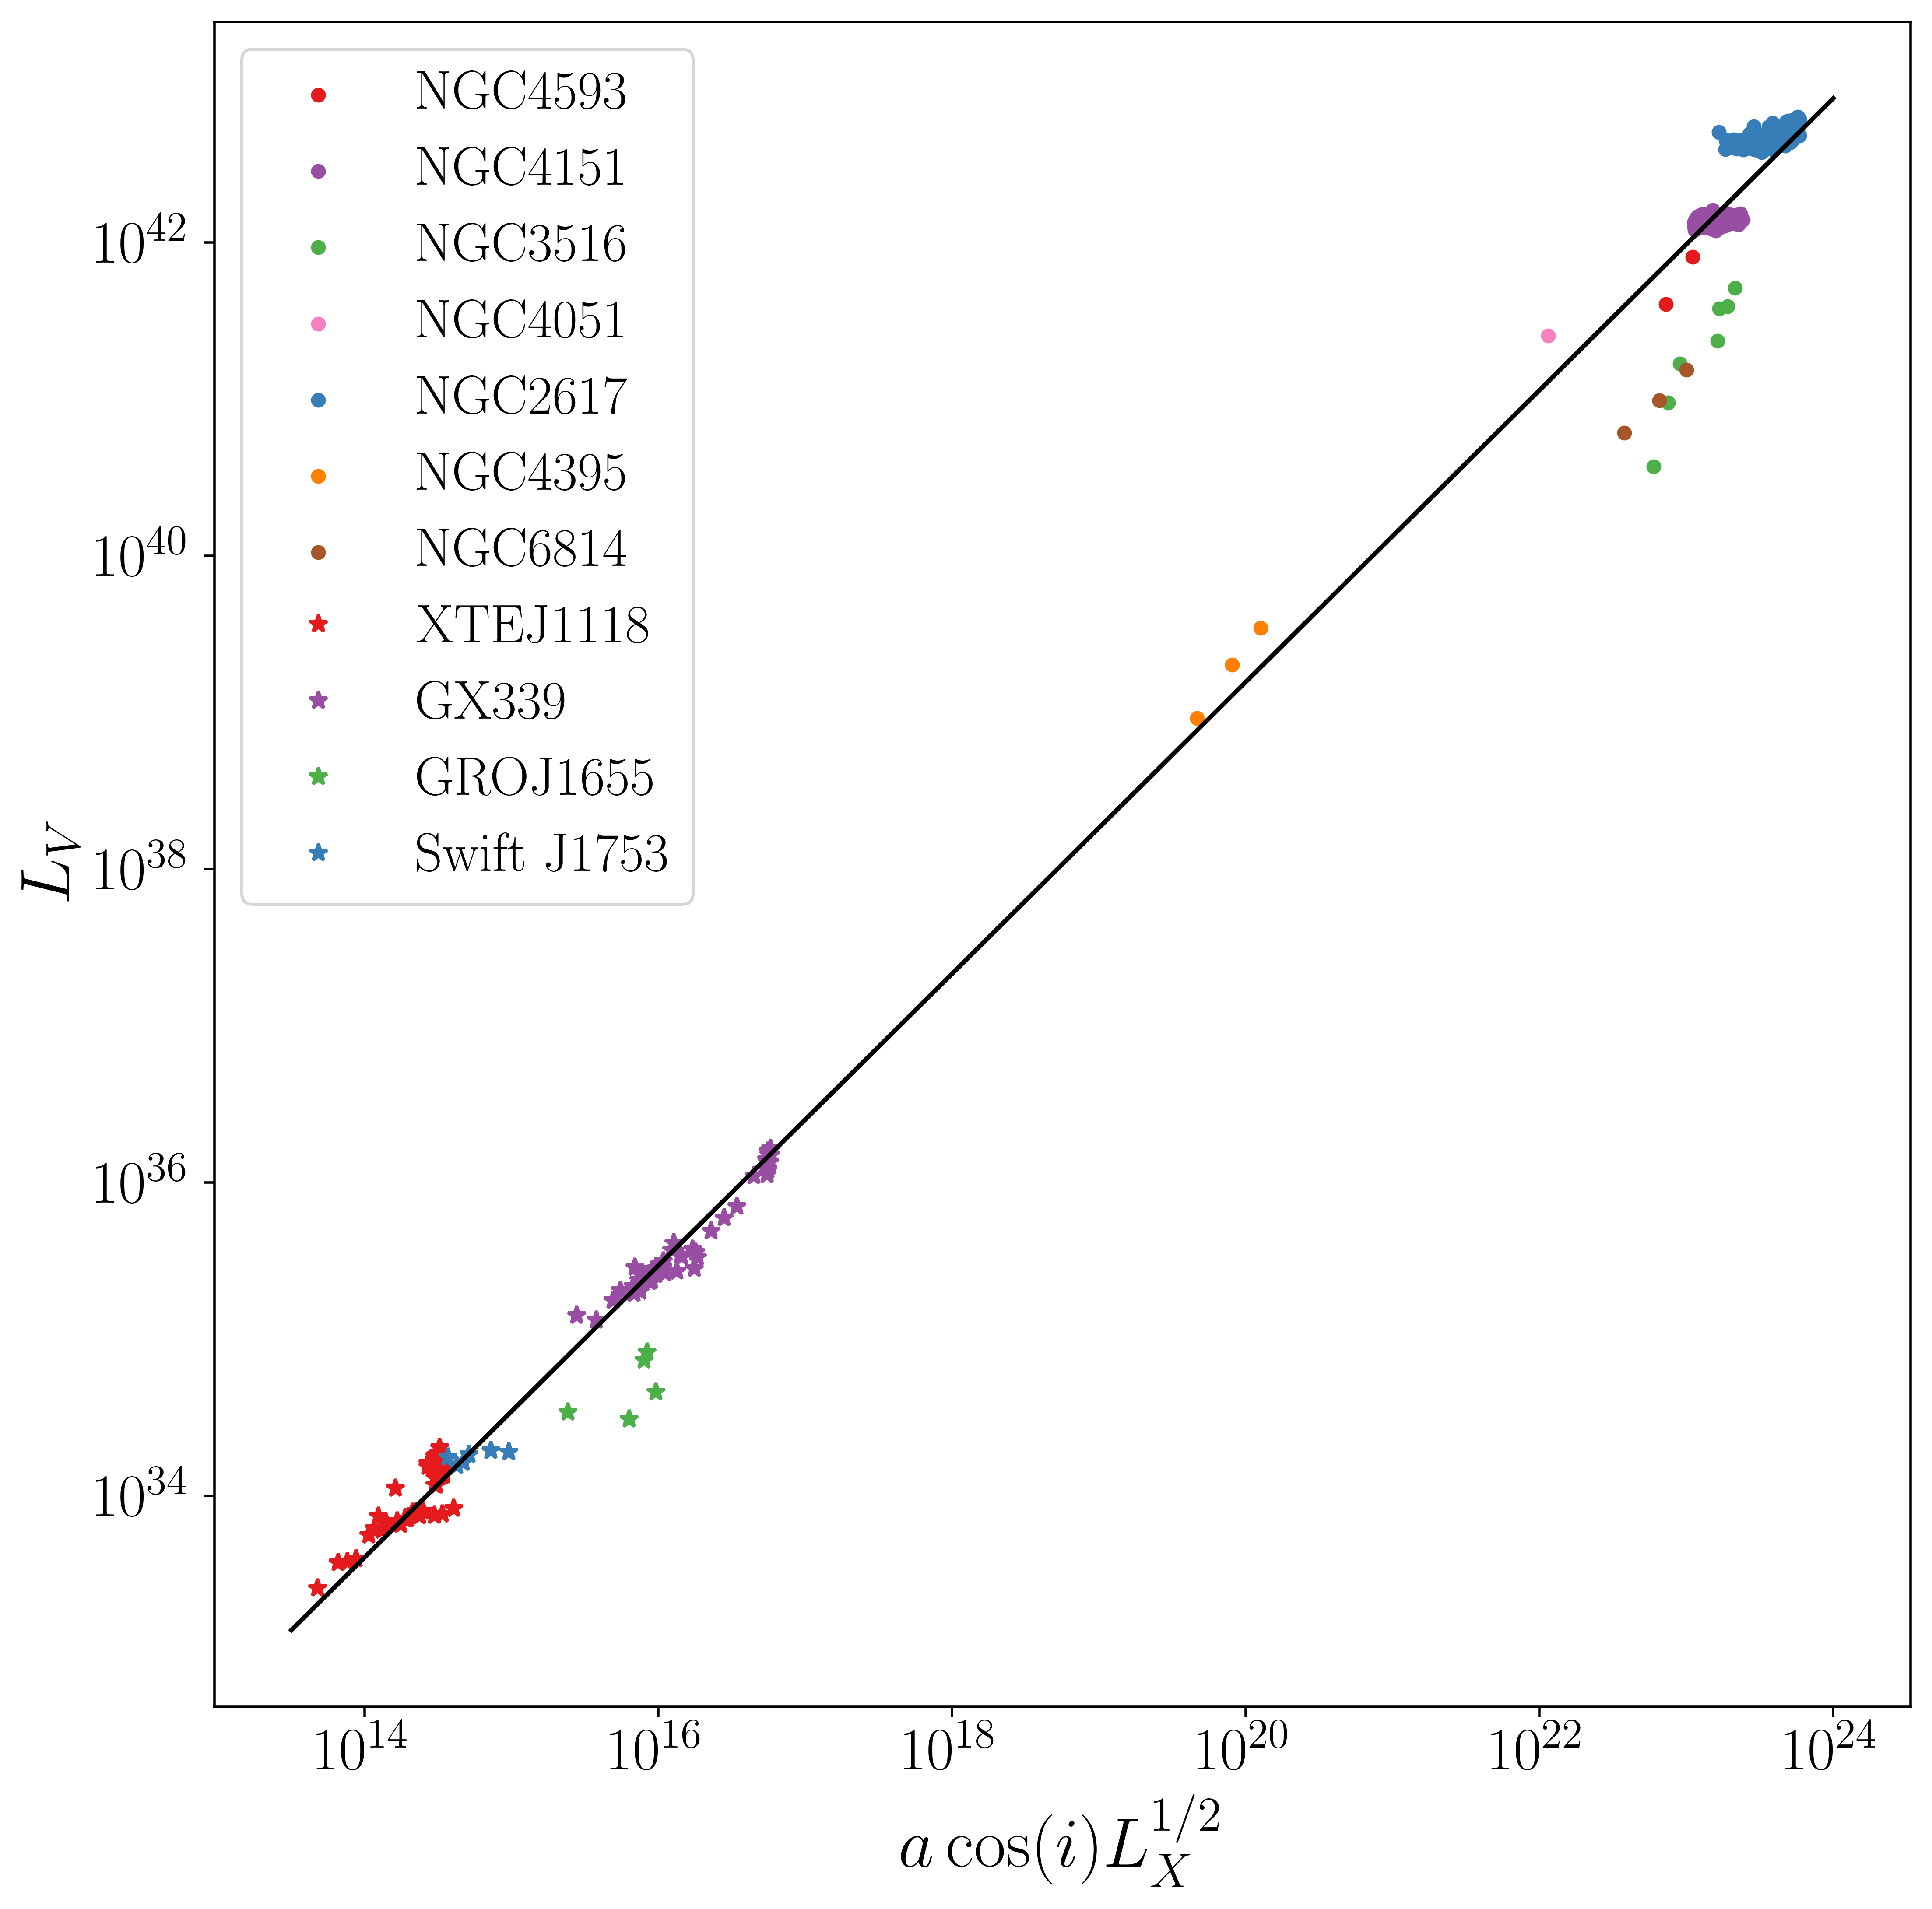

In [1336]:
# df = df[df["Target"]!="NGC4151"]
# df = df[df["Target"]!="NGC2617"]

# AGN
plt.scatter(
    n4593["sqrt(L_x) a"] * n4593["cos_i"],
    n4593["L_opt"],
    s=15,
    c=colors[0],
    label="NGC4593",
)
plt.scatter(
    n4151["sqrt(L_x) a"] * n4151["cos_i"],
    n4151["L_opt"],
    s=15,
    c=colors[8],
    label="NGC4151",
)
plt.scatter(
    n3516["sqrt(L_x) a"] * n3516["cos_i"],
    n3516["L_opt"],
    s=15,
    c=colors[5],
    label="NGC3516",
)
plt.scatter(
    n4051["sqrt(L_x) a"] * n4051["cos_i"],
    n4051["L_opt"],
    s=15,
    c=colors[15],
    label="NGC4051",
)
plt.scatter(
    n2617["sqrt(L_x) a"] * n2617["cos_i"],
    n2617["L_opt"],
    s=15,
    c=colors[3],
    label="NGC2617",
)
plt.scatter(
    n4395["sqrt(L_x) a"] * n4395["cos_i"],
    n4395["L_opt"],
    s=15,
    c=colors[10],
    label="NGC4395",
)
plt.scatter(
    n6814["sqrt(L_x) a"] * n6814["cos_i"],
    n6814["L_opt"],
    s=15,
    c=colors[13],
    label="NGC6814",
)

# XRBs
plt.plot(
    xtej["sqrt(L_x) a"] * xtej["cos_i"],
    xtej["L_opt"],
    "*",
    c=colors[2],
    label="XTEJ1118",
)
plt.plot(gx["sqrt(L_x) a"] * gx["cos_i"], gx["L_opt"], "*", c=colors[7], label="GX339")
plt.plot(
    groj["sqrt(L_x) a"] * groj["cos_i"],
    groj["L_opt"],
    "*",
    c=colors[6],
    label="GROJ1655",
)
plt.plot(
    j1753["sqrt(L_x) a"] * j1753["cos_i"],
    j1753["L_opt"],
    "*",
    c=colors[3],
    label="Swift J1753",
)


# info
plt.legend(fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$a\cos(i) L_X^{1/2} $", fontsize=23)
plt.ylabel(r"$L_{V}$", fontsize=23)


# fitting
logA = np.log10(df["sqrt(L_x) a"] * df["cos_i"])
logB = np.log10(df["L_opt"])

a, b = np.polyfit(logA, logB, 1)


xfit = np.logspace(13.5, 24, 100)


def function(x, a, b):
    return 10 ** (b) * x ** (a)


# Increase tick sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(xfit, function(xfit, a, b), c="black")

a, b  # exactly the same as the excel result

/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/2554109861.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(
/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/2554109861.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(
/var/folders/3x/30r4ysj529q8y2tqtkxxfj140000gp/T/ipykernel_52901/2554109861.py:19: UserWarning: *c* argument looks like a single numeric RGB or R

(0.8742428543803376, -1.8348808143901287)

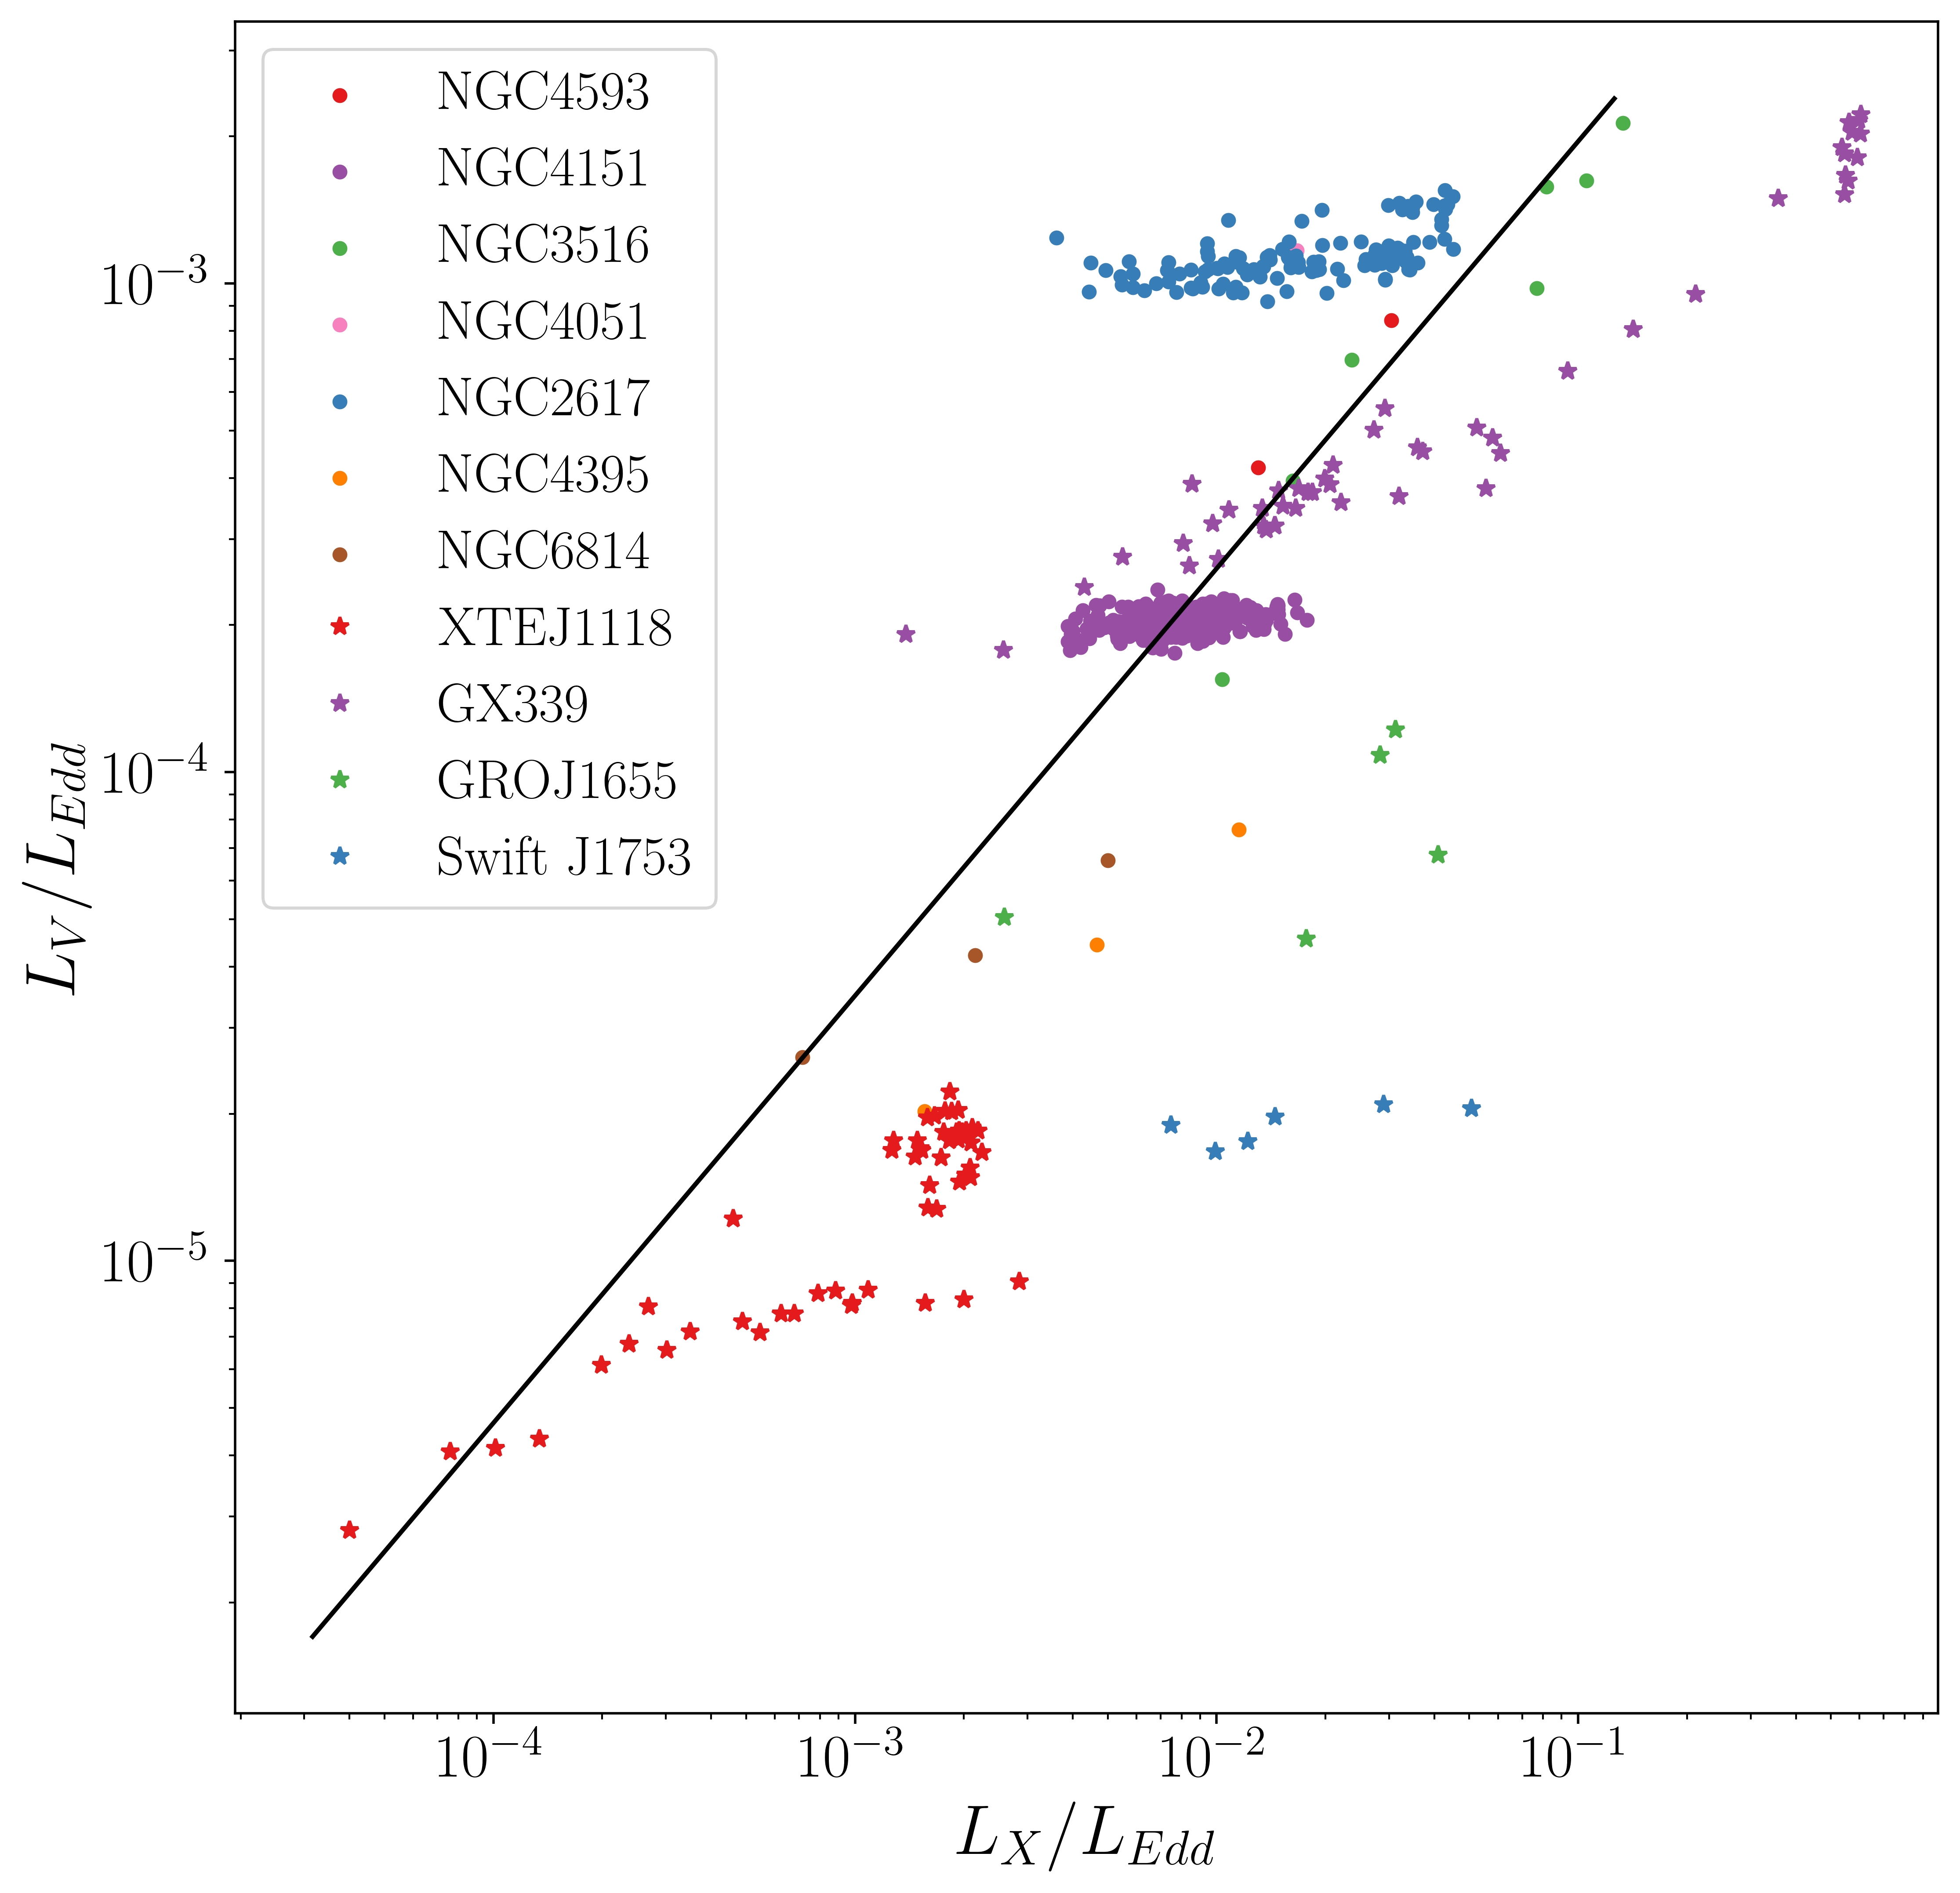

In [1332]:
# df = df[df["Target"]!="NGC4151"]
# df = df[df["Target"]!="NGC2617"]

# AGN
plt.scatter(
    n4593["L_x"] / n4593["L_edd"],
    n4593["L_opt"] / n4593["L_edd"],
    s=15,
    c=colors[0],
    label="NGC4593",
)
plt.scatter(
    n4151["L_x"] / n4151["L_edd"],
    n4151["L_opt"] / n4151["L_edd"],
    s=15,
    c=colors[8],
    label="NGC4151",
)
plt.scatter(
    n3516["L_x"] / n3516["L_edd"],
    n3516["L_opt"] / n3516["L_edd"],
    s=15,
    c=colors[5],
    label="NGC3516",
)
plt.scatter(
    n4051["L_x"] / n4051["L_edd"],
    n4051["L_opt"] / n4051["L_edd"],
    s=15,
    c=colors[15],
    label="NGC4051",
)
plt.scatter(
    n2617["L_x"] / n2617["L_edd"],
    n2617["L_opt"] / n2617["L_edd"],
    s=15,
    c=colors[3],
    label="NGC2617",
)
plt.scatter(
    n4395["L_x"] / n4395["L_edd"],
    n4395["L_opt"] / n4395["L_edd"],
    s=15,
    c=colors[10],
    label="NGC4395",
)
plt.scatter(
    n6814["L_x"] / n6814["L_edd"],
    n6814["L_opt"] / n6814["L_edd"],
    s=15,
    c=colors[13],
    label="NGC6814",
)

# XRBs
plt.plot(
    xtej["L_x"] / xtej["L_edd"],
    xtej["L_opt"] / xtej["L_edd"],
    "*",
    c=colors[2],
    label="XTEJ1118",
)
plt.plot(
    gx["L_x"] / gx["L_edd"], gx["L_opt"] / gx["L_edd"], "*", c=colors[7], label="GX339"
)
plt.plot(
    groj["L_x"] / groj["L_edd"],
    groj["L_opt"] / groj["L_edd"],
    "*",
    c=colors[6],
    label="GROJ1655",
)
plt.plot(
    j1753["L_x"] / j1753["L_edd"],
    j1753["L_opt"] / j1753["L_edd"],
    "*",
    c=colors[3],
    label="Swift J1753",
)


# info
plt.legend(fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$L_{X}/L_{Edd}$", fontsize=23)
plt.ylabel(r"$L_{V}/L_{Edd}$", fontsize=23)


# fitting
logA = np.log10(df["L_x"] / df["L_edd"])
logB = np.log10(df["L_opt"] / df["L_edd"])

a, b = np.polyfit(logA, logB, 1)


xfit = np.logspace(-4.5, -0.9, 100)


def function(x, a, b):
    return 10 ** (b) * x ** (a)


# Increase tick sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(xfit, function(xfit, a, b), c="black")

a, b  # exactly the same as the excel result

In [1324]:
df["L_edd"].isnull()
nan_locations = df["L_edd"].isnull()

# Display rows where NaN values are present
print("Rows with NaN values in 'L_edd':")
print(df[nan_locations])

Rows with NaN values in 'L_edd':
Empty DataFrame
Columns: [Target, sqrt(L_x) a, L_opt, L_x, cos_i, L_edd, m_BH]
Index: []


---

In [7]:
# AGN
# plt.plot(n4593["sqrt(L_x) a"], n4593["L_opt"], ".", c=colors[0], label="NGC4593")
# plt.plot(n4151["sqrt(L_x) a"], n4151["L_opt"], ".", c=colors[8], label="NGC4151")
# plt.plot(n3516["sqrt(L_x) a"], n3516["L_opt"], ".", c=colors[5], label="NGC3516")
# plt.plot(n4051["sqrt(L_x) a"], n4051["L_opt"], ".", c=colors[15], label="NGC4051")
# plt.plot(n2617["sqrt(L_x) a"], n2617["L_opt"], ".", c=colors[3], label="NGC2617")
# plt.plot(n4395["sqrt(L_x) a"], n4395["L_opt"], ".", c=colors[10], label="NGC4395")
# plt.plot(n6814["sqrt(L_x) a"], n6814["L_opt"], ".", c=colors[13], label="NGC6814")

# XRBs
plt.plot(xtej["sqrt(L_x) a"], xtej["L_opt"], "*", c=colors[2], label="XTEJ1118")
plt.plot(gx["sqrt(L_x) a"], gx["L_opt"], "*", c=colors[7], label="GX339")
plt.plot(groj["sqrt(L_x) a"], groj["L_opt"], "*", c=colors[6], label="GROJ1655")
plt.plot(j1753["sqrt(L_x) a"], j1753["L_opt"], "*", c=colors[3], label="Swift J1753")


# info
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\sqrt{L_x} \ a$", fontsize=16)
plt.ylabel(r"$L_{opt}$", fontsize=16)

df_xrb = df
# fitting
logA = np.log10(df_xrb["sqrt(L_x) a"])
logB = np.log10(df_xrb["L_opt"])

a, b = np.polyfit(logA, logB, 1)


xfit = np.logspace(14, 17, 100)


def function(x, a, b):
    return 10 ** (b) * x ** (a)


plt.plot(xfit, function(xfit, a, b), c="black")

a, b  # exactly the same as the excel result

NameError: name 'xtej' is not defined

In [9]:
# AGN
plt.plot(n4593["sqrt(L_x) a"], n4593["L_opt"], ".", c=colors[0], label="NGC4593")
plt.plot(n4151["sqrt(L_x) a"], n4151["L_opt"], ".", c=colors[8], label="NGC4151")
plt.plot(n3516["sqrt(L_x) a"], n3516["L_opt"], ".", c=colors[5], label="NGC3516")
plt.plot(n4051["sqrt(L_x) a"], n4051["L_opt"], ".", c=colors[15], label="NGC4051")
plt.plot(n2617["sqrt(L_x) a"], n2617["L_opt"], ".", c=colors[3], label="NGC2617")
plt.plot(n4395["sqrt(L_x) a"], n4395["L_opt"], ".", c=colors[10], label="NGC4395")
plt.plot(n6814["sqrt(L_x) a"], n6814["L_opt"], ".", c=colors[13], label="NGC6814")
# XRBs
# plt.plot(xtej['sqrt(L_x) a'], xtej['L_opt'],   '.', c=colors[2], label='XTEJ1118')
# plt.plot(gx['sqrt(L_x) a'], gx['L_opt'],       '.', c=colors[1], label='GX339')
# plt.plot(groj['sqrt(L_x) a'], groj['L_opt'],   '.', c=colors[0], label='GROJ1655')


# info
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\sqrt{L_x} \ a$", fontsize=16)
plt.ylabel(r"$L_{opt}$", fontsize=16)

df_filtered = df

# fitting
logA = np.log10(df_filtered["sqrt(L_x) a"])
logB = np.log10(df_filtered["L_opt"])

a, b = np.polyfit(logA, logB, 1)


xfit = np.logspace(20, 24, 100)


def function(x, a, b):
    return 10 ** (b) * x ** (a)


plt.plot(xfit, function(xfit, a, b), c="black")

a, b  # exactly the same as the excel result

NameError: name 'n4593' is not defined

## Another Correlation

In [ ]:
f = pd.read_csv("/Users/avm4/work/GitHub/astrophysics/agn-xrb/data/lag-size.csv")
# f = f[f['Source']!='Cyg X-2']

f

In [ ]:
f = f[f["Source"] != "Cyg X-2"]
f = f[f["type"] == "BH LMXB"]
f

### New Analysis

#### Objectives
- Plot the data
- Plot the error bar
- Put the linear fitting function and check

In [ ]:
f = f[f["Source"] != "Cyg X-2"]
f
x = np.array(f["disc.radius(ls)"])
y = np.array(f["optical lag (s)"])
yerr = np.array(f["+-"])
labels = np.array(f["Source"])

In [ ]:
for i in range(len(x)):
    # print(f['Source'][i])
    plt.errorbar(x[i], y[i], yerr=yerr[i], label=labels[i], capsize=5, fmt="o")

xfit = np.logspace(0.5, 1.65, 100)  # 2.1


def func(x, a, b):
    return 10 ** (b) * x ** (a)


popt, pcov = curve_fit(func, x, y)
print(popt)
plt.plot(
    xfit, func(xfit, *popt), "-", color="black"
)  # label="fit: a=%5.3f, b=%5.3f" % tuple(popt))

# Increase tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# info
plt.legend(fontsize=15)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Disk Radius (ls)", fontsize=20)
plt.ylabel("Optical lag (s)", fontsize=20)

### Previous Code (Non-linear Regression)

In [ ]:
sns.regplot(x="disc.radius(ls)", y="optical lag (s)", scatter=False, ci=None, data=f)
sns.scatterplot(x="disc.radius(ls)", y="optical lag (s)", data=f, hue="Source")

In [ ]:
sns.scatterplot(x="disc.radius(ls)", y="optical lag (s)", c="b", data=f, hue="Source")
sns.regplot(x="disc.radius(ls)", y="optical lag (s)", scatter=False, ci=95, data=f)
x = f["disc.radius(ls)"]
dy = f["+-"]
y = f["optical lag (s)"]
plt.errorbar(x, y, yerr=dy, c="black", fmt="none", elinewidth=1, capsize=2)

### Without Cyg X-2

In [ ]:
# without Cyg X-2
f = f[f["Source"] != "Cyg X-2"]
f

In [189]:
sns.regplot(x="disc.radius(ls)", y="optical lag (s)", scatter=False, ci=None, data=f)
sns.scatterplot(x="disc.radius(ls)", y="optical lag (s)", data=f, hue="Source")
plt.xscale("log")


plt.yscale("log")

NameError: name 'f' is not defined

In [191]:
x = f["disc.radius(ls)"]
dy = f["+-"]
y = f["optical lag (s)"]
sns.scatterplot(x="disc.radius(ls)", y="optical lag (s)", c="b", data=f, hue="Source")
sns.regplot(x="disc.radius(ls)", y="optical lag (s)", scatter=False, ci=95, data=f)

plt.errorbar(x, y, yerr=dy, c="black", fmt="none", elinewidth=1, capsize=2)
plt.xscale("log")
plt.yscale("log")

NameError: name 'f' is not defined